In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Flatten,Embedding, LSTM, SimpleRNN, GRU, Bidirectional, Dropout
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical, pad_sequences
import matplotlib.pyplot as plt

In [2]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [4]:
simple_rnn_model = Sequential()
simple_rnn_model.add(Embedding(max_features, 32))
simple_rnn_model.add(SimpleRNN(32))
simple_rnn_model.add(Dropout(0.4))
simple_rnn_model.add(Dense(1, activation='sigmoid'))

lstm_model = Sequential()
lstm_model.add(Embedding(max_features, 32))
lstm_model.add(LSTM(32))
lstm_model.add(Dropout(0.4))
lstm_model.add(Dense(1, activation='sigmoid'))

bidirectional_srnn_model = Sequential()
bidirectional_srnn_model.add(Embedding(max_features, 32))
bidirectional_srnn_model.add(Bidirectional(SimpleRNN(32, return_sequences=True)))
bidirectional_srnn_model.add(Bidirectional(SimpleRNN(32)))
bidirectional_srnn_model.add(Dropout(0.4))
bidirectional_srnn_model.add(Dense(1, activation='sigmoid'))

bidirectional_lstm_model = Sequential()
bidirectional_lstm_model.add(Embedding(max_features, 32))
bidirectional_lstm_model.add(Bidirectional(LSTM(32, return_sequences=True)))
bidirectional_lstm_model.add(Bidirectional(LSTM(32)))
bidirectional_lstm_model.add(Dropout(0.4))
bidirectional_lstm_model.add(Dense(1, activation='sigmoid'))

In [5]:
simple_rnn_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
bidirectional_srnn_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
bidirectional_lstm_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/5
547/547 [==============================] - 84s 149ms/step - loss: 0.6169 - accuracy: 0.6375 - val_loss: 0.4582 - val_accuracy: 0.8029
Epoch 2/5
547/547 [==============================] - 74s 135ms/step - loss: 0.4575 - accuracy: 0.7997 - val_loss: 0.4404 - val_accuracy: 0.8032
Epoch 3/5
547/547 [==============================] - 68s 124ms/step - loss: 0.3346 - accuracy: 0.8652 - val_loss: 0.4594 - val_accuracy: 0.8203
Epoch 4/5
547/547 [==============================] - 73s 133ms/step - loss: 0.2612 - accuracy: 0.8976 - val_loss: 0.4410 - val_accuracy: 0.8407
Epoch 5/5
547/547 [==============================] - 73s 133ms/step - loss: 0.2057 - accuracy: 0.9248 - val_loss: 0.4360 - val_accuracy: 0.8388


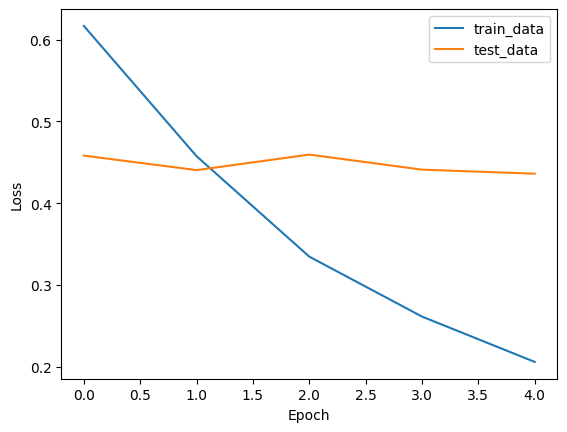

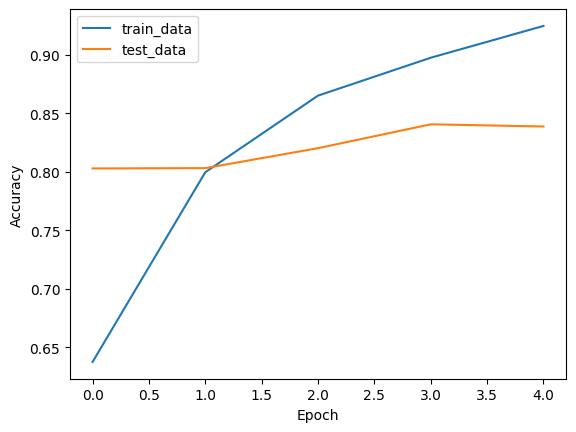

782/782 [==============================] - 21s 26ms/step - loss: 0.4511 - accuracy: 0.8310
Точність на тестовому наборі: 83.10%


In [6]:
history_simple_rnn = simple_rnn_model.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3)
plt.plot(history_simple_rnn.history['loss'], label='train_data')
plt.plot(history_simple_rnn.history['val_loss'], label='test_data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_simple_rnn.history['accuracy'], label='train_data')
plt.plot(history_simple_rnn.history['val_accuracy'], label='test_data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
test_loss, test_accuracy = simple_rnn_model.evaluate(input_test, y_test)
print(f'Точність на тестовому наборі: {test_accuracy * 100:.2f}%')

Epoch 1/5
547/547 [==============================] - 120s 216ms/step - loss: 0.4839 - accuracy: 0.7689 - val_loss: 0.3213 - val_accuracy: 0.8676
Epoch 2/5
547/547 [==============================] - 118s 216ms/step - loss: 0.2932 - accuracy: 0.8875 - val_loss: 0.2859 - val_accuracy: 0.8817
Epoch 3/5
547/547 [==============================] - 119s 217ms/step - loss: 0.2440 - accuracy: 0.9129 - val_loss: 0.2864 - val_accuracy: 0.8828
Epoch 4/5
547/547 [==============================] - 118s 215ms/step - loss: 0.2135 - accuracy: 0.9227 - val_loss: 0.3174 - val_accuracy: 0.8805
Epoch 5/5
547/547 [==============================] - 118s 216ms/step - loss: 0.1937 - accuracy: 0.9342 - val_loss: 0.3040 - val_accuracy: 0.8885


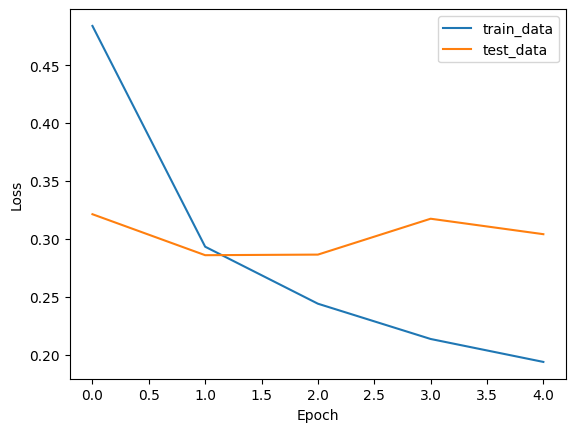

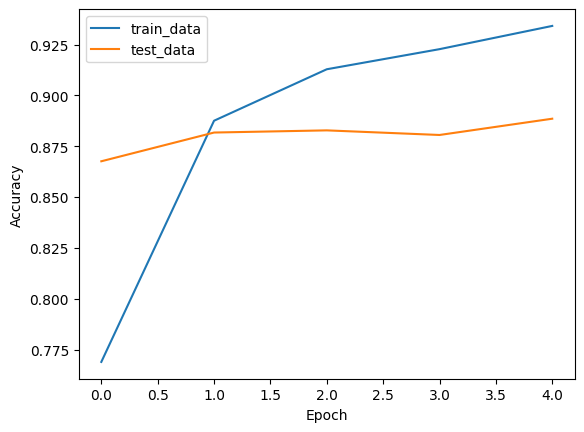

782/782 [==============================] - 35s 45ms/step - loss: 0.3337 - accuracy: 0.8801
Точність на тестовому наборі: 88.01%


In [7]:
history_lstm = lstm_model.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3)
plt.plot(history_lstm.history['loss'], label='train_data')
plt.plot(history_lstm.history['val_loss'], label='test_data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_lstm.history['accuracy'], label='train_data')
plt.plot(history_lstm.history['val_accuracy'], label='test_data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
test_loss, test_accuracy = lstm_model.evaluate(input_test, y_test)
print(f'Точність на тестовому наборі: {test_accuracy * 100:.2f}%')

Epoch 1/5
547/547 [==============================] - 265s 478ms/step - loss: 0.6121 - accuracy: 0.6555 - val_loss: 0.4836 - val_accuracy: 0.7813
Epoch 2/5
547/547 [==============================] - 264s 483ms/step - loss: 0.4548 - accuracy: 0.8023 - val_loss: 0.4288 - val_accuracy: 0.8228
Epoch 3/5
547/547 [==============================] - 264s 482ms/step - loss: 0.3831 - accuracy: 0.8386 - val_loss: 0.3892 - val_accuracy: 0.8371
Epoch 4/5
547/547 [==============================] - 272s 497ms/step - loss: 0.3154 - accuracy: 0.8743 - val_loss: 0.5026 - val_accuracy: 0.8080
Epoch 5/5
547/547 [==============================] - 265s 484ms/step - loss: 0.2683 - accuracy: 0.8955 - val_loss: 0.4150 - val_accuracy: 0.8300


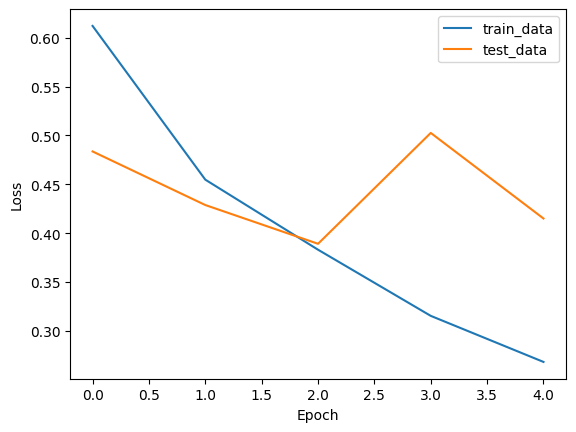

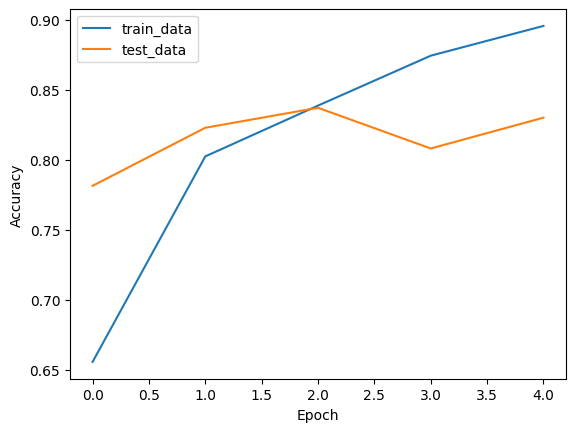

782/782 [==============================] - 66s 85ms/step - loss: 0.4138 - accuracy: 0.8290
Точність на тестовому наборі: 82.90%


In [8]:
history_bidirectional_srnn = bidirectional_srnn_model.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3)
plt.plot(history_bidirectional_srnn.history['loss'], label='train_data')
plt.plot(history_bidirectional_srnn.history['val_loss'], label='test_data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_bidirectional_srnn.history['accuracy'], label='train_data')
plt.plot(history_bidirectional_srnn.history['val_accuracy'], label='test_data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
test_loss, test_accuracy = bidirectional_srnn_model.evaluate(input_test, y_test)
print(f'Точність на тестовому наборі: {test_accuracy * 100:.2f}%')

Epoch 1/5
547/547 [==============================] - 468s 842ms/step - loss: 0.5012 - accuracy: 0.7353 - val_loss: 0.3561 - val_accuracy: 0.8485
Epoch 2/5
547/547 [==============================] - 460s 842ms/step - loss: 0.3003 - accuracy: 0.8819 - val_loss: 0.3304 - val_accuracy: 0.8608
Epoch 3/5
547/547 [==============================] - 461s 843ms/step - loss: 0.2364 - accuracy: 0.9140 - val_loss: 0.3174 - val_accuracy: 0.8731
Epoch 4/5
547/547 [==============================] - 460s 842ms/step - loss: 0.1990 - accuracy: 0.9316 - val_loss: 0.3052 - val_accuracy: 0.8760
Epoch 5/5
547/547 [==============================] - 460s 841ms/step - loss: 0.1720 - accuracy: 0.9417 - val_loss: 0.3461 - val_accuracy: 0.8753


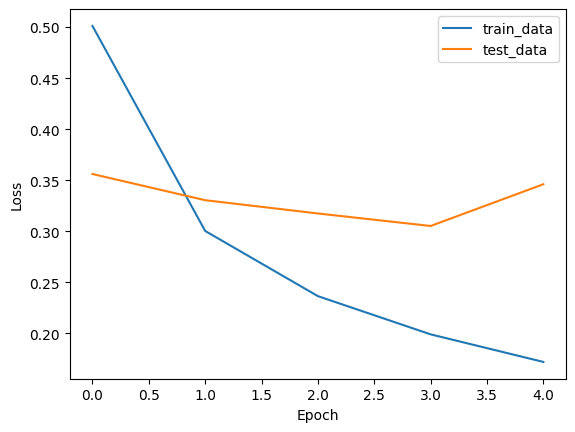

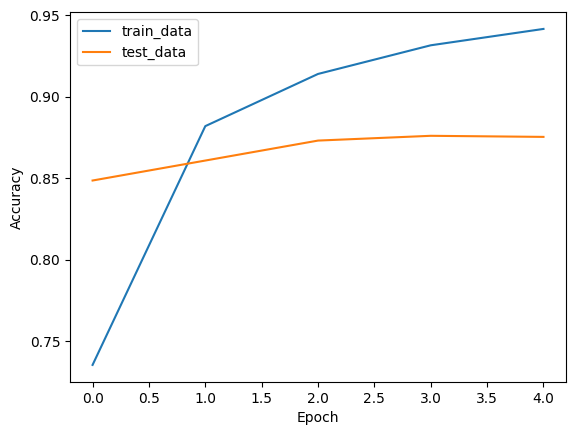

782/782 [==============================] - 126s 161ms/step - loss: 0.3677 - accuracy: 0.8635
Точність на тестовому наборі: 86.35%


In [9]:
history_bidirectional_lstm = bidirectional_lstm_model.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3)
plt.plot(history_bidirectional_lstm.history['loss'], label='train_data')
plt.plot(history_bidirectional_lstm.history['val_loss'], label='test_data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_bidirectional_lstm.history['accuracy'], label='train_data')
plt.plot(history_bidirectional_lstm.history['val_accuracy'], label='test_data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
test_loss, test_accuracy = bidirectional_lstm_model.evaluate(input_test, y_test)
print(f'Точність на тестовому наборі: {test_accuracy * 100:.2f}%')

Висновок: Найкращу точінсть показують моделі LSTM та Bidirectional_LSTM, проте остання займає дуже багато часу. Тому, найкраще використовувати для побудови моделі LSTM.